In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import glob, os
import seaborn as sns
from scipy import stats
import statsmodels.stats.multitest as multi

In [2]:
gencode = pd.read_table('C:/Users/beatr/OneDrive - FCT NOVA/Ambiente de Trabalho/3º ano - 2022,2023/Projeto/Dados/human.gencode.v37.annotation.bed', encoding = 'utf8')
pacientes = pd.read_table('C:/Users/beatr/OneDrive - FCT NOVA/Ambiente de Trabalho/3º ano - 2022,2023/Projeto/Dados/patient_clinical_info.tab', encoding = 'utf8')
# pacientes

In [3]:
# Read tables with expression of FOXO4 in all tissues
tissue = []
names = []

for table in glob.glob ('C:/Users/beatr/OneDrive - FCT NOVA/Ambiente de Trabalho/3º ano - 2022,2023/Projeto/Dados/gene_expression_levels_tpms/*.tab'):
    print(table)
    n = os.path.basename(table)
    n = n.split('.')[0]
    names.append(n)
    t = pd.read_table(table)
    foxo = t[t["Gene ID"] == 'ENSG00000184481.17']
    tissue.append(foxo)

C:/Users/beatr/OneDrive - FCT NOVA/Ambiente de Trabalho/3º ano - 2022,2023/Projeto/Dados/gene_expression_levels_tpms\adipose-subcutaneous.tpms.tab
C:/Users/beatr/OneDrive - FCT NOVA/Ambiente de Trabalho/3º ano - 2022,2023/Projeto/Dados/gene_expression_levels_tpms\adipose-visceral.tpms.tab
C:/Users/beatr/OneDrive - FCT NOVA/Ambiente de Trabalho/3º ano - 2022,2023/Projeto/Dados/gene_expression_levels_tpms\artery-aorta.tpms.tab
C:/Users/beatr/OneDrive - FCT NOVA/Ambiente de Trabalho/3º ano - 2022,2023/Projeto/Dados/gene_expression_levels_tpms\artery-coronary.tpms.tab
C:/Users/beatr/OneDrive - FCT NOVA/Ambiente de Trabalho/3º ano - 2022,2023/Projeto/Dados/gene_expression_levels_tpms\artery-tibial.tpms.tab
C:/Users/beatr/OneDrive - FCT NOVA/Ambiente de Trabalho/3º ano - 2022,2023/Projeto/Dados/gene_expression_levels_tpms\brain-cerebellum.tpms.tab
C:/Users/beatr/OneDrive - FCT NOVA/Ambiente de Trabalho/3º ano - 2022,2023/Projeto/Dados/gene_expression_levels_tpms\brain-cortex.tpms.tab
C:/User

In [4]:
tissues= pd.concat (tissue)
tissues =  pd.DataFrame(tissues)
tissues ['SMTSD'] = names
tissues = tissues.set_index ('SMTSD')
tissues = tissues.T
tissues =  tissues.drop (['Gene ID', 'Transcript ID', 'Length'])
tissues =  tissues.reset_index() 
tissues = tissues.rename(columns={'index': 'SAMPID'})
# tissues

In [5]:
# Table with age and expression by tissue - FOXO4
exp = pd.merge (pacientes, tissues)
exp = exp.set_index ('SAMPID')
exp = exp.T
exp = exp.drop (["SMTSD", 'RACE', 'SEX'])    
exp = exp.T
exp ["Age Group"] = np.where (exp["AGE"] < 60, 'Young', 'Old')
exp

,AGE,adipose-subcutaneous,adipose-visceral,artery-aorta,artery-coronary,artery-tibial,brain-cerebellum,brain-cortex,breast-mammary-tissue,colon-sigmoid,...,liver,lung,muscle-skeletal,nerve-tibial,pituitary,skin-not-sun-exposed,skin-sun-exposed,testis,thyroid,Age Group
SAMPID,,,,,,,,,,,,,,,,,,,,,
GTEX_111FC_0226_SM_5N9B8,61,4.091,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Old
GTEX_1128S_2126_SM_5H12U,66,5.042,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Old
GTEX_11DXW_0326_SM_5H11W,43,2.574,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Young
GTEX_11EMC_2826_SM_5PNY6,66,2.806,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Old
GTEX_11EQ9_2526_SM_5HL66,33,4.437,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Young
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GTEX_ZUA1_0926_SM_4YCDX,46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.288,Young
GTEX_ZVT3_0726_SM_5GICN,67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.375,Old
GTEX_ZVZQ_0626_SM_59HJU,62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.164,Old


In [6]:
#Cálculo do pvalue em todos os tecidos - FOXO1
pvalue =[]

for i in names:
    exp_age = pd.DataFrame([exp ['Age Group'], exp['{}'.format(i)]])
    exp_age = exp_age.T
    exp_y = exp_age.loc[exp_age['Age Group'] == 'Young']
    exp_y = pd.DataFrame ([exp_y ["{}".format(i)]])
    exp_y = exp_y.T
    exp_y = exp_y.dropna()
    exp_o = exp_age.loc[exp_age['Age Group'] == 'Old']
    exp_o = pd.DataFrame ([exp_o ["{}".format(i)]])
    exp_o = exp_o.T
    exp_o = exp_o.dropna()
    r, p = stats.mannwhitneyu(exp_y, exp_o)
    p = np.round(p, 3)
    pvalue.append(['{}'.format(i), p[0]])

    
pvalue = pd.DataFrame(pvalue)
pvalue.columns = ['tissue', 'pvalue']
pvalue = pvalue.dropna()
pvalue = pvalue.reset_index(drop = True)

pvalue1 = pvalue['pvalue']

adjpvalue = multi.multipletests (pvalue1, alpha =0.05, method = 'fdr_bh', is_sorted = False)  #Cálculo do adjusted pvalue
pvalue['adj_pvalue'] = adjpvalue[1]

significance = []  #Coluna com a significância dos pvalues
for i in range(21):
    if (pvalue['adj_pvalue'][i] <=0.05) and (pvalue['adj_pvalue'][i] > 0.025) :
        significance.append('*')
    elif (pvalue['adj_pvalue'][i] <= 0.025) and (pvalue['adj_pvalue'][i] > 0.01) :
        significance.append('**')
    elif pvalue['adj_pvalue'][i] <= 0.01 :
        significance.append('***')
    else:
        significance.append('') 
pvalue ['significance'] = significance
pvalue = pvalue.dropna(how ='any')
pvalue = pvalue.reset_index(drop = True)

pvalue

,tissue,pvalue,adj_pvalue,significance
0,adipose-subcutaneous,0.843,0.885150,
1,adipose-visceral,0.142,0.674625,
2,artery-aorta,0.514,0.674625,
3,artery-coronary,0.732,0.885150,
4,artery-tibial,0.308,0.674625,
5,brain-cerebellum,0.443,0.674625,
6,brain-cortex,0.133,0.674625,
7,breast-mammary-tissue,0.841,0.885150,
8,colon-sigmoid,0.229,0.674625,
9,esophagus-gastroesophageal-junction,0.838,0.885150,


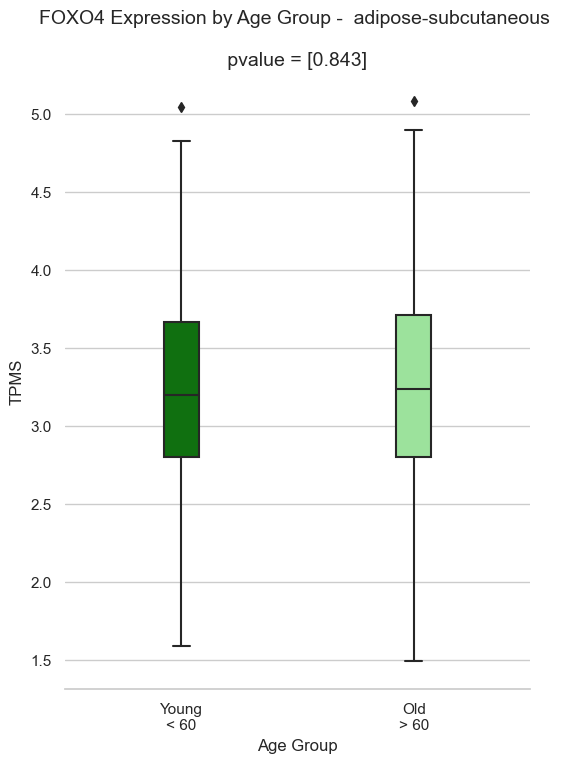

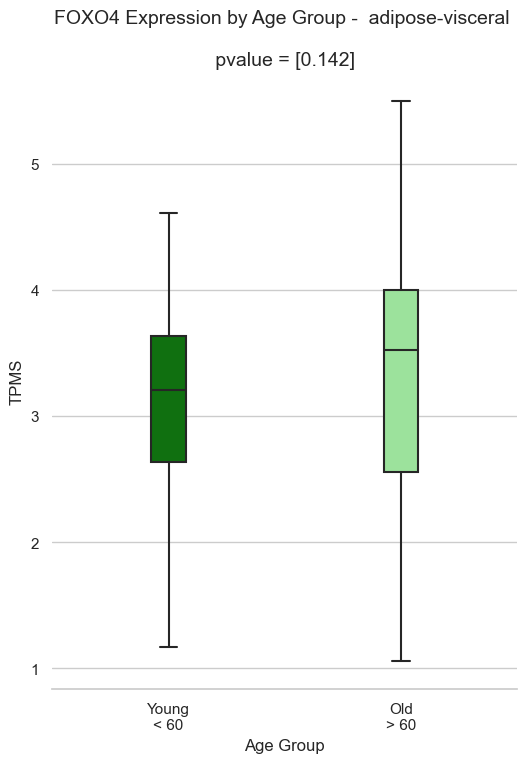

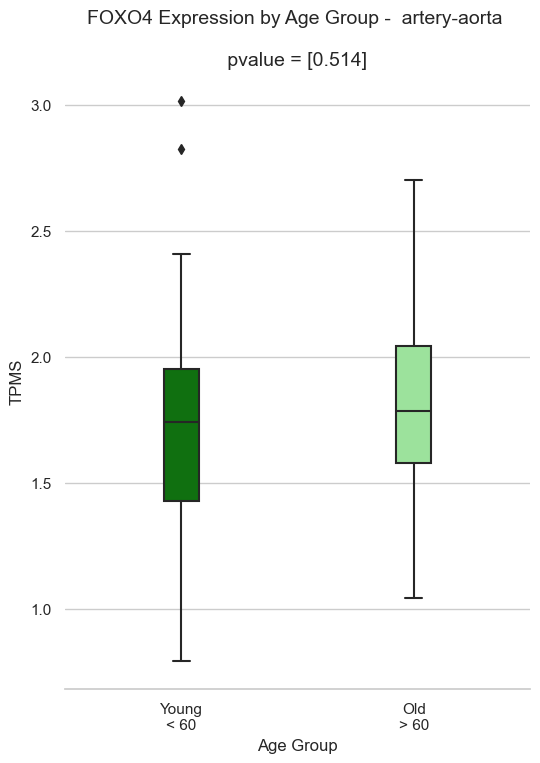

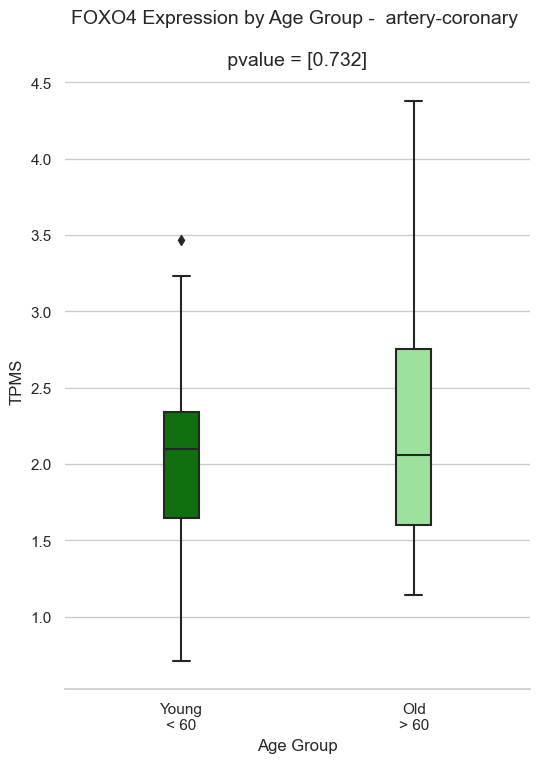

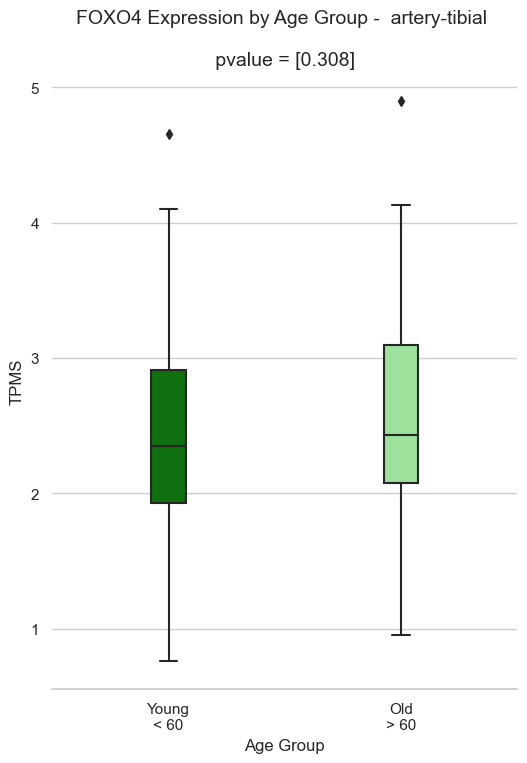

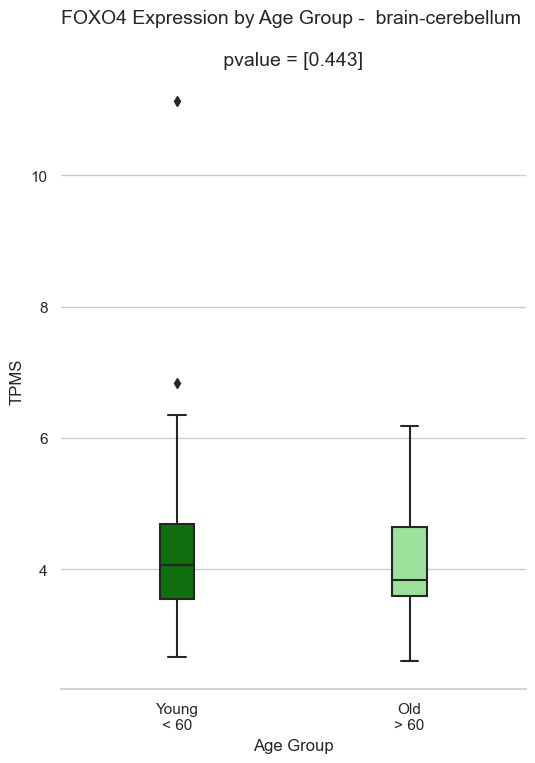

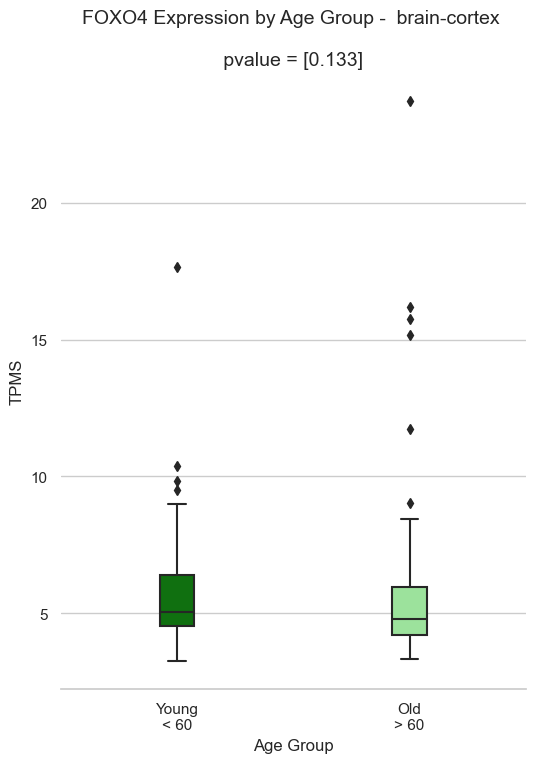

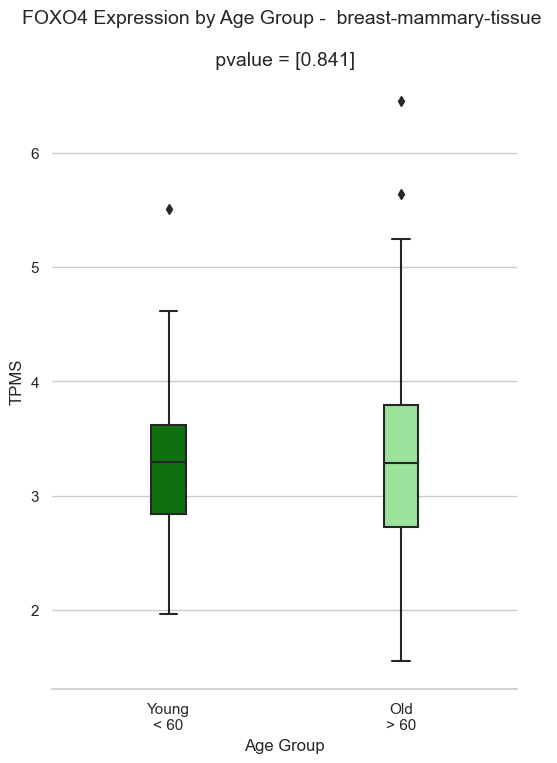

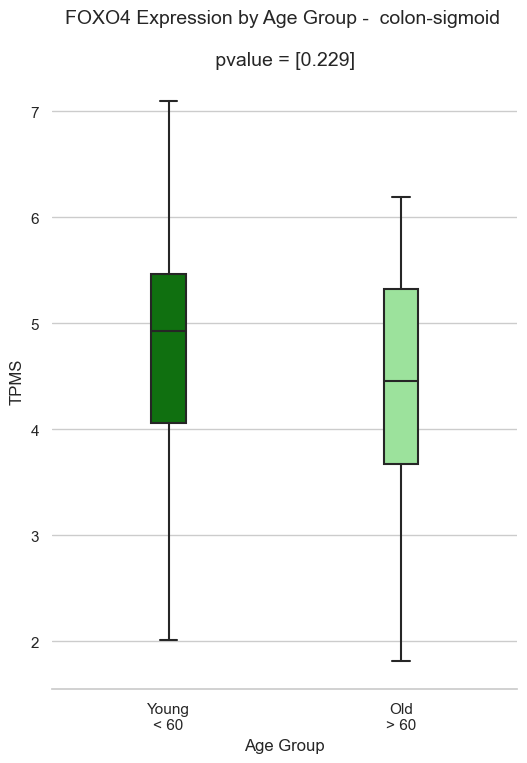

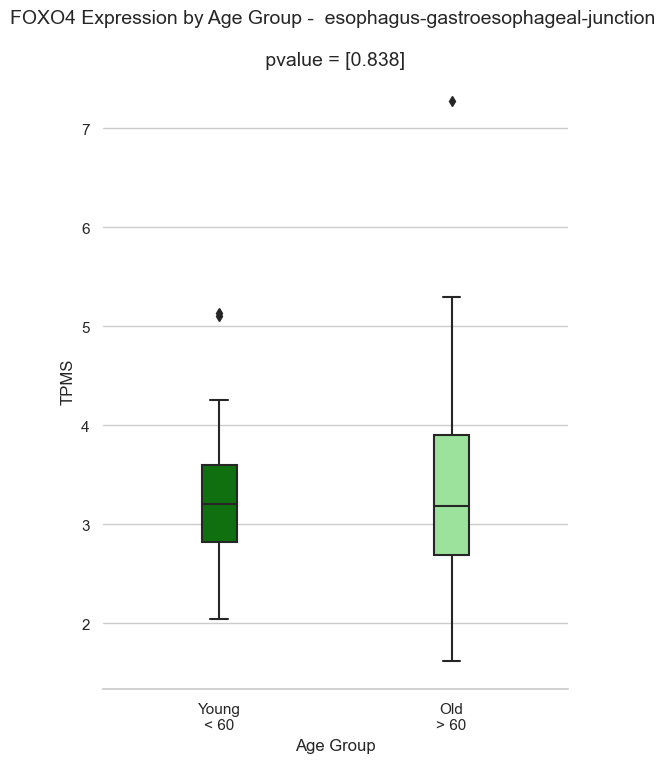

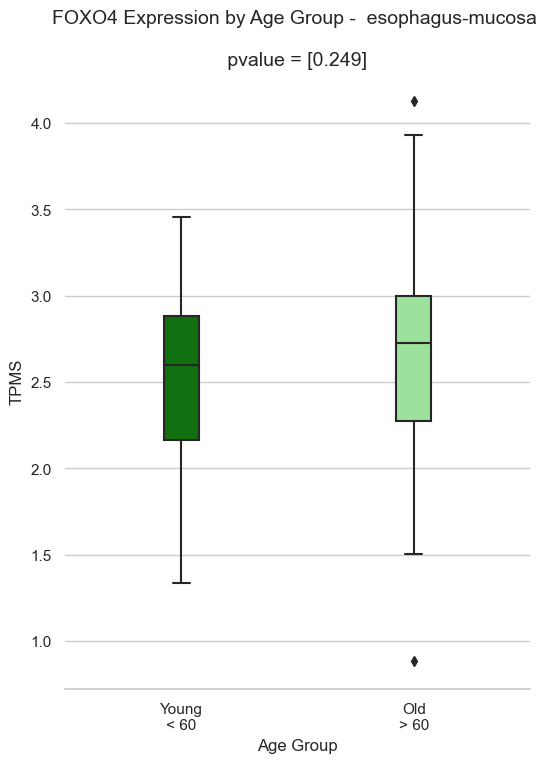

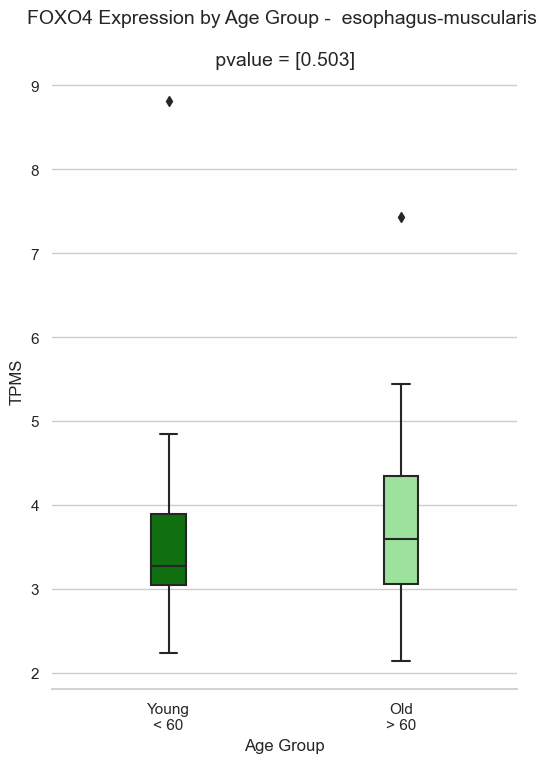

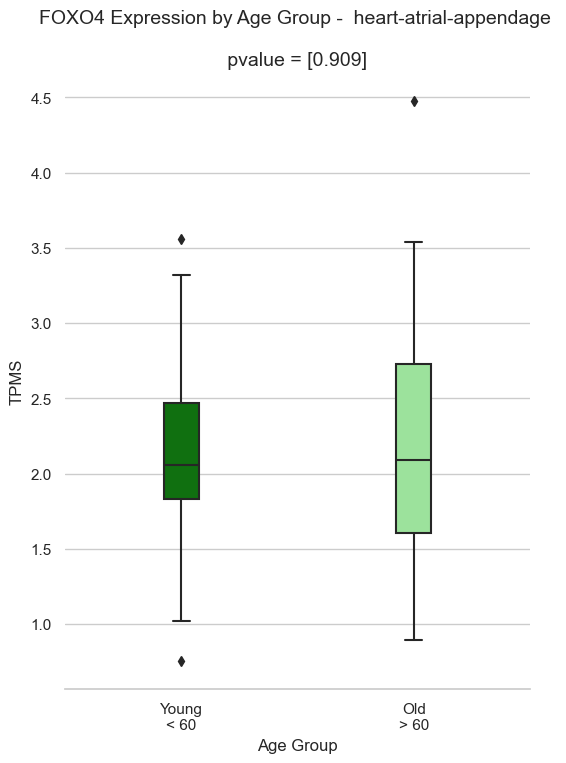

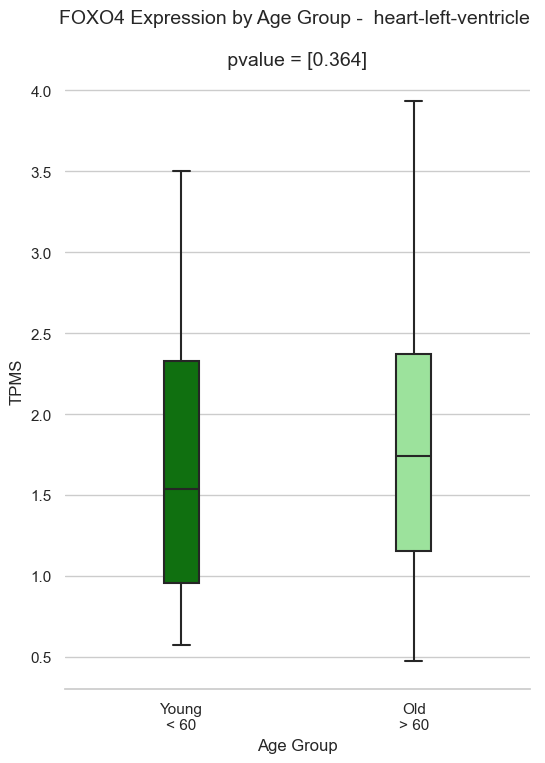

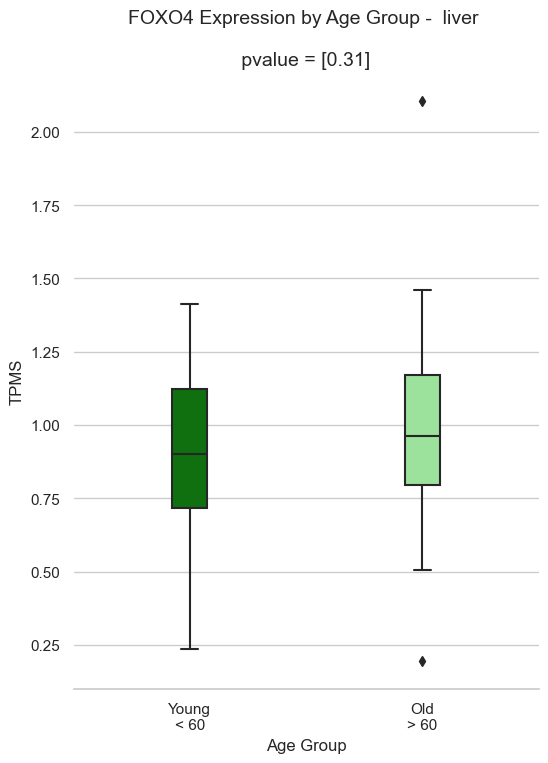

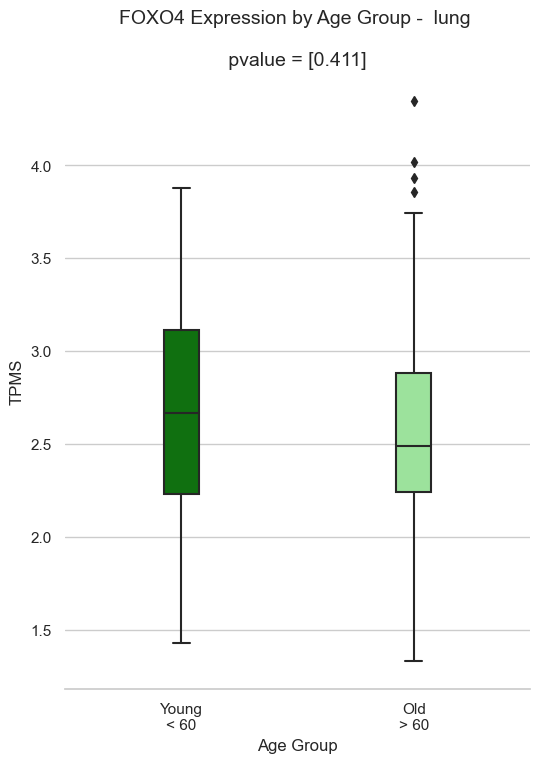

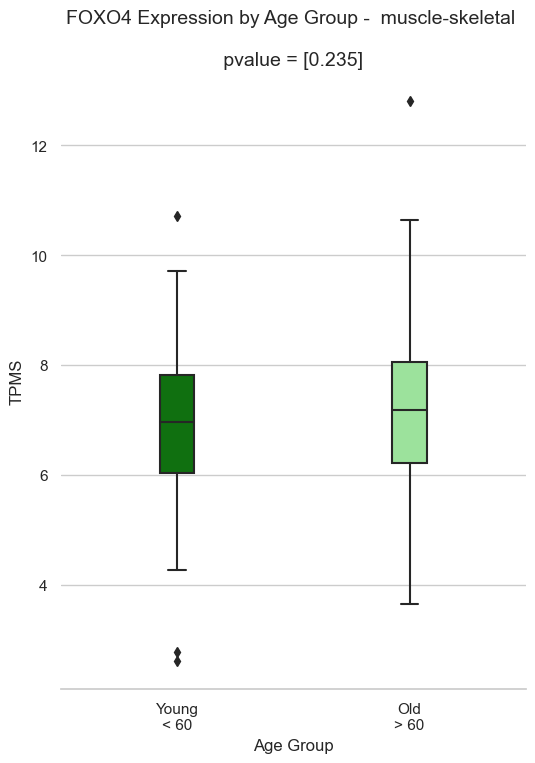

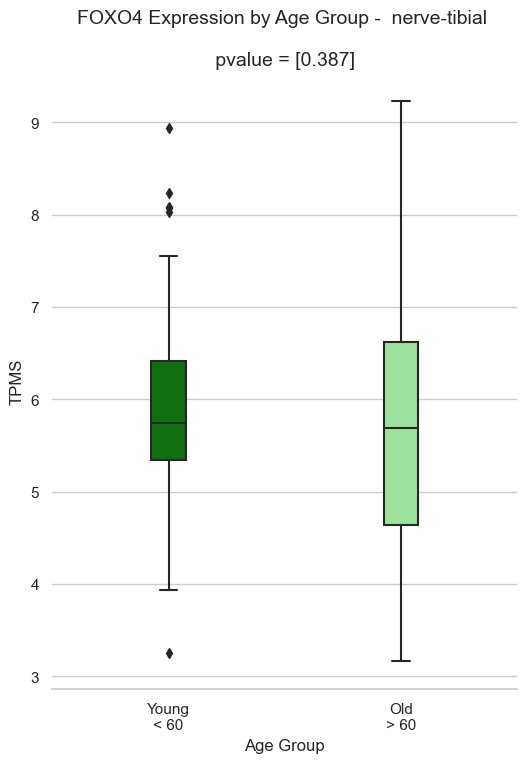

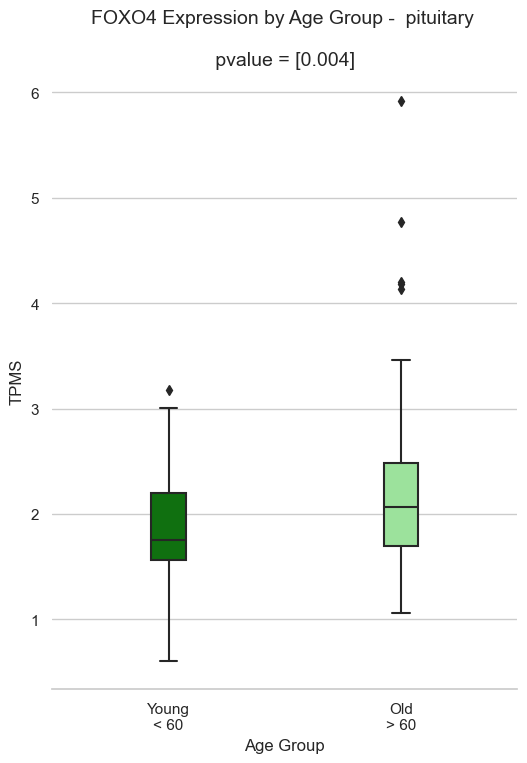

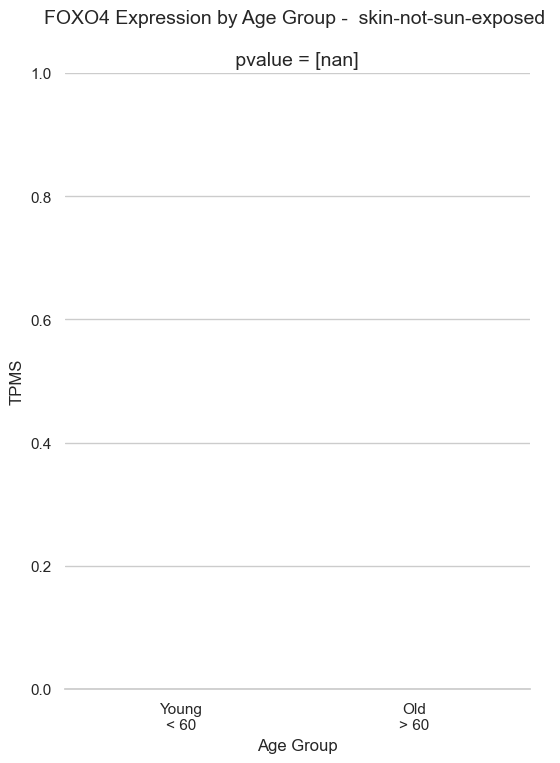

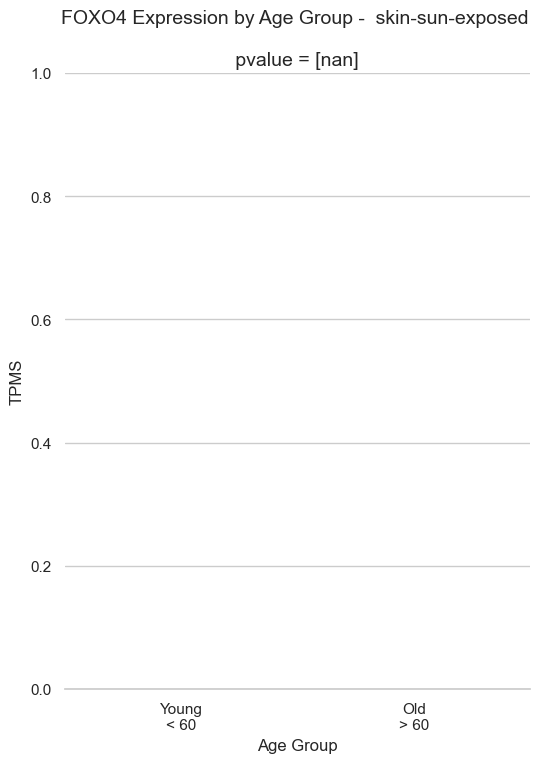

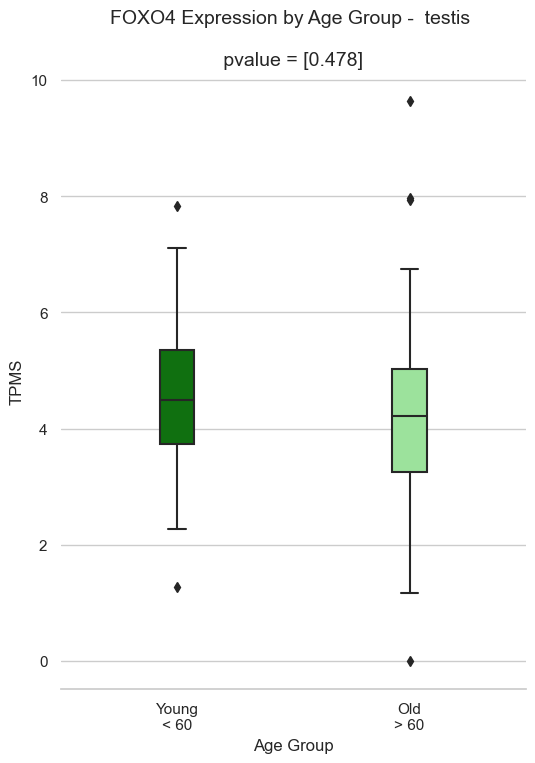

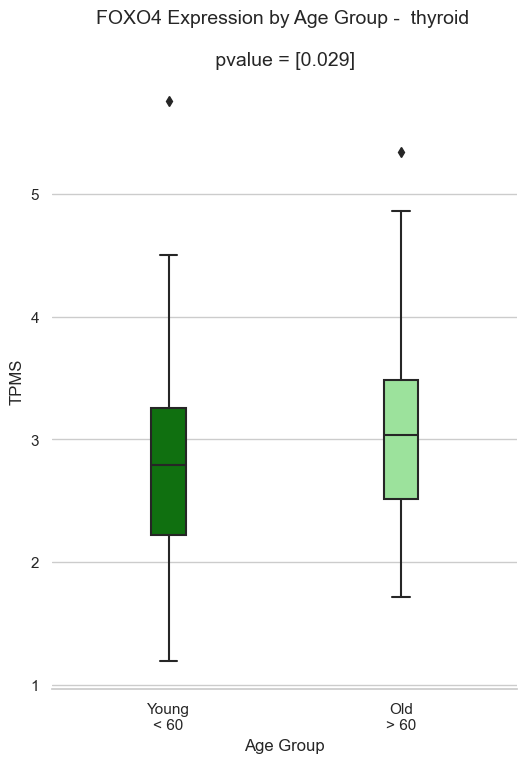

In [8]:
# FOXO4 expression by age in all tissues
for t in names:    
    sns.set (style = 'whitegrid')
    fig, ax = plt.subplots (figsize = (6,8))
    sns.boxplot(data=exp, x="Age Group", y="{}".format(t), palette = ('green', 'lightgreen'), width =.15)
    exp_age = pd.DataFrame([exp ['Age Group'], exp['{}'.format(t)]])
    exp_age = exp_age.T
    exp_y = exp_age.loc[exp_age['Age Group'] == 'Young']
    exp_y = pd.DataFrame ([exp_y ["{}".format(t)]])
    exp_y = exp_y.T
    exp_y = exp_y.dropna()
    exp_o = exp_age.loc[exp_age['Age Group'] == 'Old']
    exp_o = pd.DataFrame ([exp_o ["{}".format(t)]])
    exp_o = exp_o.T
    exp_o = exp_o.dropna()
    r, p = stats.mannwhitneyu(exp_y, exp_o)
    p = np.round(p, 3)
    plt.title ('FOXO4 Expression by Age Group -  {} \n \n pvalue = {} '.format(t, p), fontsize=14)
    plt.xlabel ('Age Group')
    plt.ylabel ('TPMS')
    sns.despine (top = True, right = True, left = True, bottom = False)
    #plt.ylim([0.0,1.4])
    #plt.yticks (np.arange(0.0,1.6,0.2))
    props = dict (boxstyle = 'round', facecolor = 'lightgreen', alpha = 0.1)
#     ax.text(-0.6, 0, 'pvalue = ' + str(p), fontsize = 12, bbox = props)
    xvalues = ['Young\n< 60', 'Old\n> 60']
    plt.xticks(np.arange (2), xvalues)
#     plt.savefig('{}.png'.format(t), format='png')
    plt.show ()
    

In [7]:
t_exp = exp.drop('AGE', axis = 1).melt(id_vars='Age Group', var_name='tissue', value_name='tpms') #Ajuste da tabela de forma aos tecidos ficarem numa coluna

dict = {'adipose-subcutaneous': 'Adipose-Subcut',
 'adipose-visceral': 'Adipose-Visceral',
 'artery-aorta': 'Artery-Aorta',
 'artery-coronary': 'Artery-Coronary',
 'artery-tibial': 'Artery-Tibial',
 'brain-cerebellum': 'Brain-Cerebellum',
 'brain-cortex': 'Brain-Cortex',
 'breast-mammary-tissue': 'Breast-Mammary',
 'colon-sigmoid': 'Colon-Sigmoid',
 'esophagus-gastroesophageal-junction': 'Esophagus-Gastro',
 'esophagus-mucosa': 'Esophagus-Mucosa',
 'esophagus-muscularis': 'Esophagus-Muscle',
 'heart-atrial-appendage': 'Heart-Atrial-App',
 'heart-left-ventricle': 'Heart-L-Ventricle',
 'lung': 'Lung',
 'liver': 'Liver',
 'muscle-skeletal': 'Muscle-Skeletal',
 'nerve-tibial': 'Nerve',
 'pituitary': 'Pituitary',
 'skin-sun-exposed': 'Skin-Not-Exposed',
 'skin-not-sun-exposed': 'Skin-Exposed',
 'testis': 'Testis',
 'thyroid': 'Thyroid'}

new_labels = pd.Series(t_exp['tissue']).map(dict).values
t_exp['tissue'] = new_labels

t_exp = t_exp.dropna() 
t_exp 

,Age Group,tissue,tpms
0,Old,Adipose-Subcut,4.091
1,Old,Adipose-Subcut,5.042
2,Young,Adipose-Subcut,2.574
3,Old,Adipose-Subcut,2.806
4,Young,Adipose-Subcut,4.437
...,...,...,...
55816,Young,Thyroid,3.288
55817,Old,Thyroid,2.375
55818,Old,Thyroid,3.164
55819,Young,Thyroid,2.138


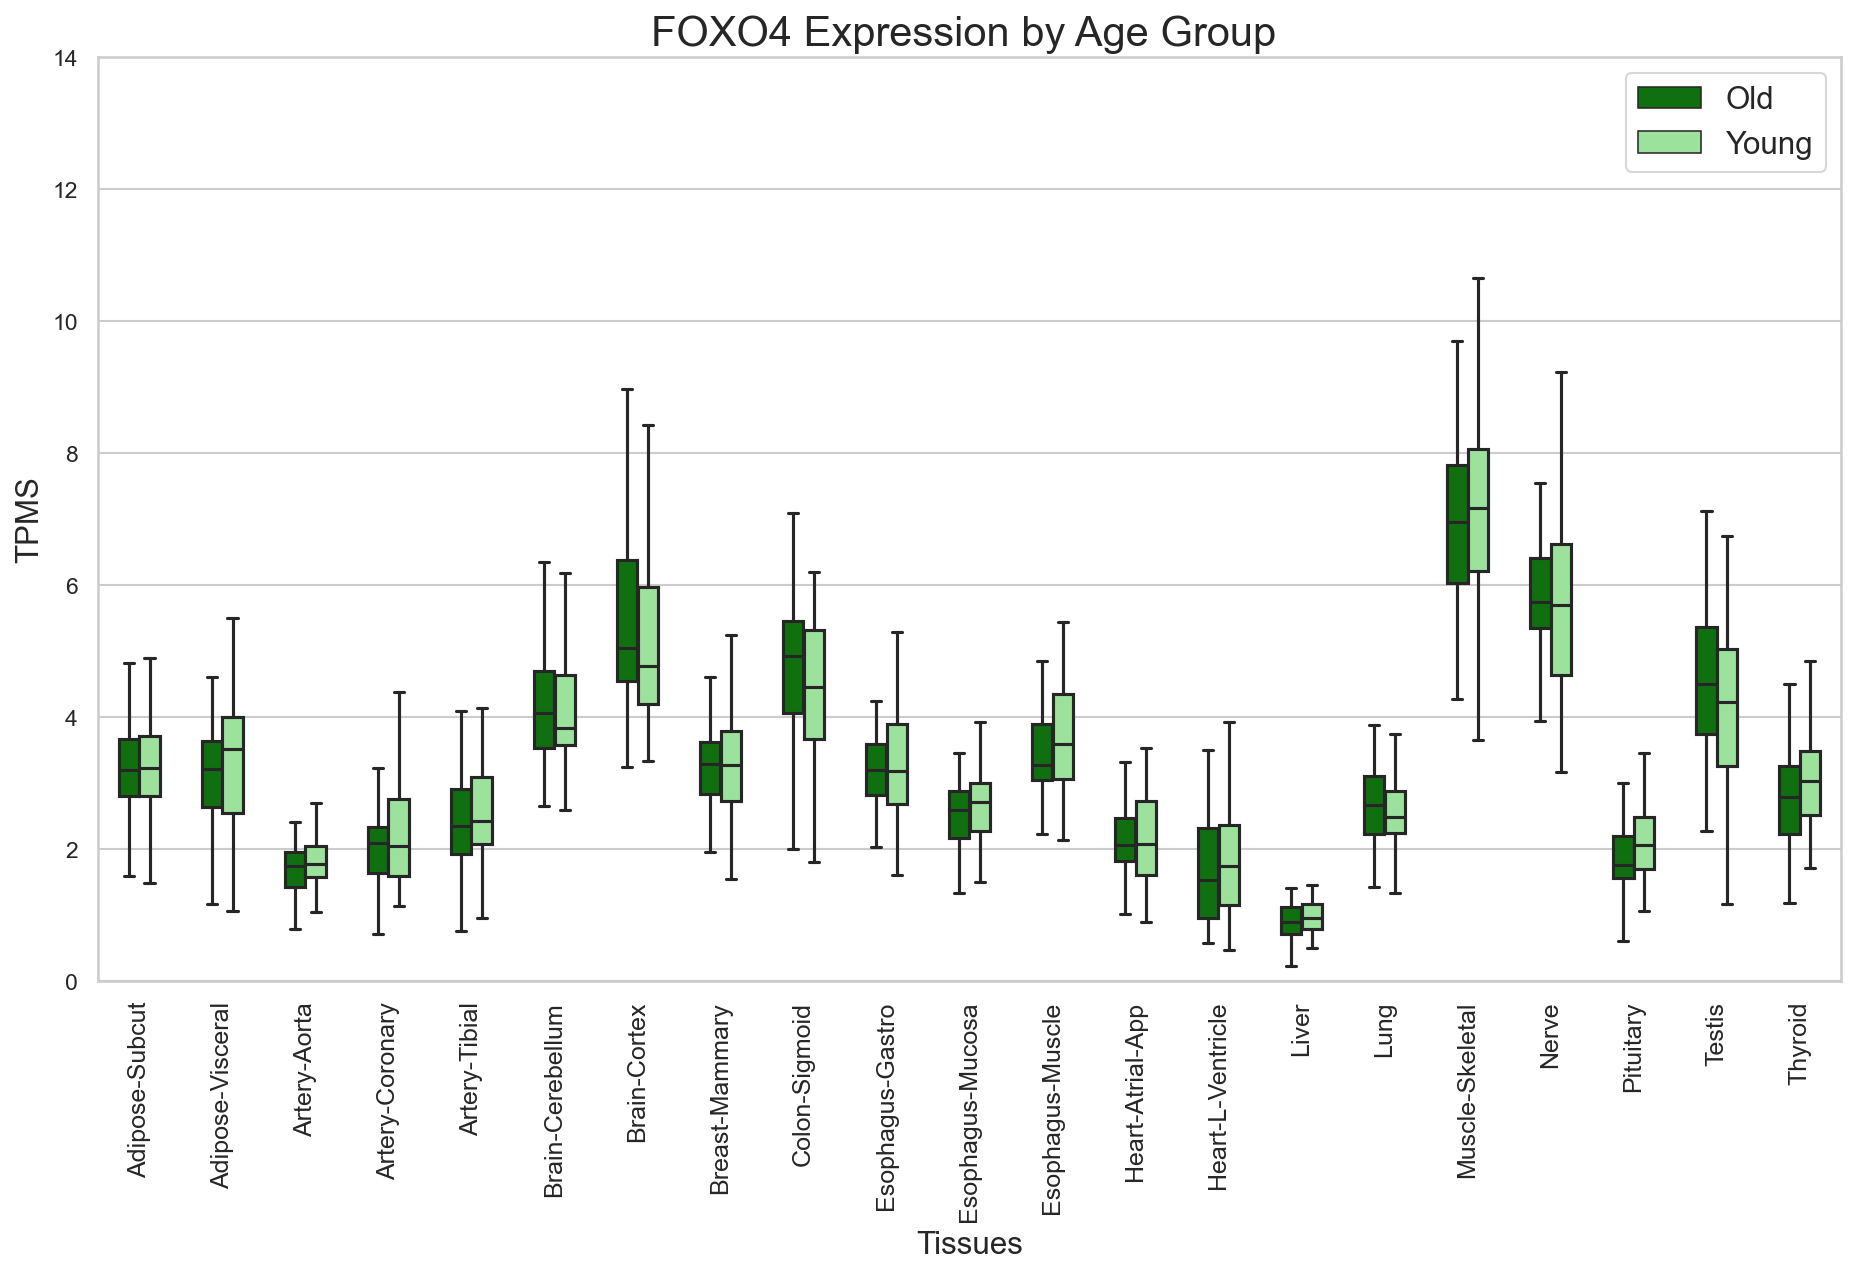

In [8]:
#Gráfico com a expressão do FOXO1 em todos os tecidos
sns.set (style = 'whitegrid')
fig, ax = plt.subplots (figsize = (15,8), dpi = 150)
sns.boxplot(data= t_exp, x="tissue", y='tpms', hue = 'Age Group', palette = ('green', 'lightgreen'), width =.5, fliersize=0)
plt.title ('FOXO4 Expression by Age Group ', fontsize=20)
plt.xticks(rotation = 90, fontsize = 12)
plt.xlabel ('Tissues', fontsize = 15)
plt.ylabel ('TPMS', fontsize = 15)
plt.legend (fontsize = 15)
ax.set_ylim([0, 14])

a = -0.175   #Colocar * no gráfico de acordo com a significância
for i in range (21):
    ax.text(a, 11, pvalue['significance'][i], fontsize = 30)
    a = a + 1 
    
plt.savefig('FOXO4 Expression by Age Group.png', format = 'png', dpi = 1200, bbox_inches ='tight')

In [10]:
#Tabela com identificação se os níveis de expressão são High ou Low, de acordo com a mediana
exp_med = t_exp.groupby('tissue').median().reset_index()
exp_med.columns = ['tissue','median']

exp_m = t_exp.merge(exp_med)
exp_m['Expression'] = np.where (exp_m['tpms'] < exp_m['median'], 'Low', 'High')
exp_m = exp_m.drop('Age Group', axis = 1)
exp_m = exp_m.dropna ()

exp_m

C:\Users\beatr\AppData\Local\Temp\ipykernel_23772\3127763976.py:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.median is deprecated. In a future version, a TypeError will be raised. Before calling .median, select only columns which should be valid for the function.
  exp_med = t_exp.groupby('tissue').median().reset_index()


,tissue,tpms,median,Expression
0,Adipose-Subcut,4.091,3.2175,High
1,Adipose-Subcut,5.042,3.2175,High
2,Adipose-Subcut,2.574,3.2175,Low
3,Adipose-Subcut,2.806,3.2175,Low
4,Adipose-Subcut,4.437,3.2175,High
...,...,...,...,...
2422,Thyroid,3.288,2.8575,High
2423,Thyroid,2.375,2.8575,Low
2424,Thyroid,3.164,2.8575,High
2425,Thyroid,2.138,2.8575,Low


In [14]:
names1 = list(pd.Series(names).map(dict).values)
names1.remove('Skin-Exposed')
names1.remove('Skin-Not-Exposed')
names1


['Adipose-Subcut',
 'Adipose-Visceral',
 'Artery-Aorta',
 'Artery-Coronary',
 'Artery-Tibial',
 'Brain-Cerebellum',
 'Brain-Cortex',
 'Breast-Mammary',
 'Colon-Sigmoid',
 'Esophagus-Gastro',
 'Esophagus-Mucosa',
 'Esophagus-Muscle',
 'Heart-Atrial-App',
 'Heart-L-Ventricle',
 'Liver',
 'Lung',
 'Muscle-Skeletal',
 'Nerve',
 'Pituitary',
 'Testis',
 'Thyroid']

In [15]:
#Cálculo do pvalue em todos os tecidos - med
pvalue_med =[]

for i in names1:
    exp_mediana = exp_m.drop('median', axis = 1)
    exp_mediana = exp_mediana[exp_mediana['tissue'] == '{}'.format(i)]
    exp_h = exp_mediana[exp_mediana['Expression'] == 'High']
    exp_h = exp_h.dropna()
    exp_l = exp_mediana[exp_mediana['Expression'] == 'Low']
    exp_l = exp_l.dropna()
    x = exp_h['tpms'].astype('float')
    y = exp_l['tpms'].astype('float')
    r_med, p_med = stats.mannwhitneyu(x, y)
    pvalue_med.append([i, p_med])

pvalue_med = pd.DataFrame(pvalue_med)
pvalue_med = pvalue_med.dropna()

s = pvalue_med.sort_values(1)
pvalue_med.columns = ['tissue', 'pvalue']
pvalue_med = pvalue_med.reset_index(drop = True)

pvalue_ = pvalue_med['pvalue']


adj_pvalue = multi.multipletests (pvalue_, alpha =0.05, method = 'fdr_bh', is_sorted = False)  #Cálculo do adjusted pvalue

adj = []   #Arredondamento do adj_pvalue
for i in range(len(adj_pvalue[1])):  
    adj.append('{:.2e}'.format(adj_pvalue[1][i]))
pvalue_med ['adj_pvalue'] = adj



significance_med = []  #Níveis de significância dos adj_pvalues
for i in range(21):
    if (float(pvalue_med['adj_pvalue'][i]) <= 3.08e-25):
        significance_med.append('*')
    else:
        significance_med.append('') 
pvalue_med ['significance'] = significance_med

pvalue_med

,tissue,pvalue,adj_pvalue,significance
0,Adipose-Subcut,9.379219e-28,6.57e-27,*
1,Adipose-Visceral,8.262003e-24,1.74e-23,
2,Artery-Aorta,3.173829e-15,4.44e-15,
3,Artery-Coronary,1.415656e-09,1.42e-09,
4,Artery-Tibial,8.784765e-26,3.08e-25,*
5,Brain-Cerebellum,8.263010e-24,1.74e-23,
6,Brain-Cortex,5.850329e-25,1.54e-24,
7,Breast-Mammary,3.302249e-18,5.78e-18,
8,Colon-Sigmoid,9.720950e-14,1.13e-13,
9,Esophagus-Gastro,4.525012e-14,5.59e-14,


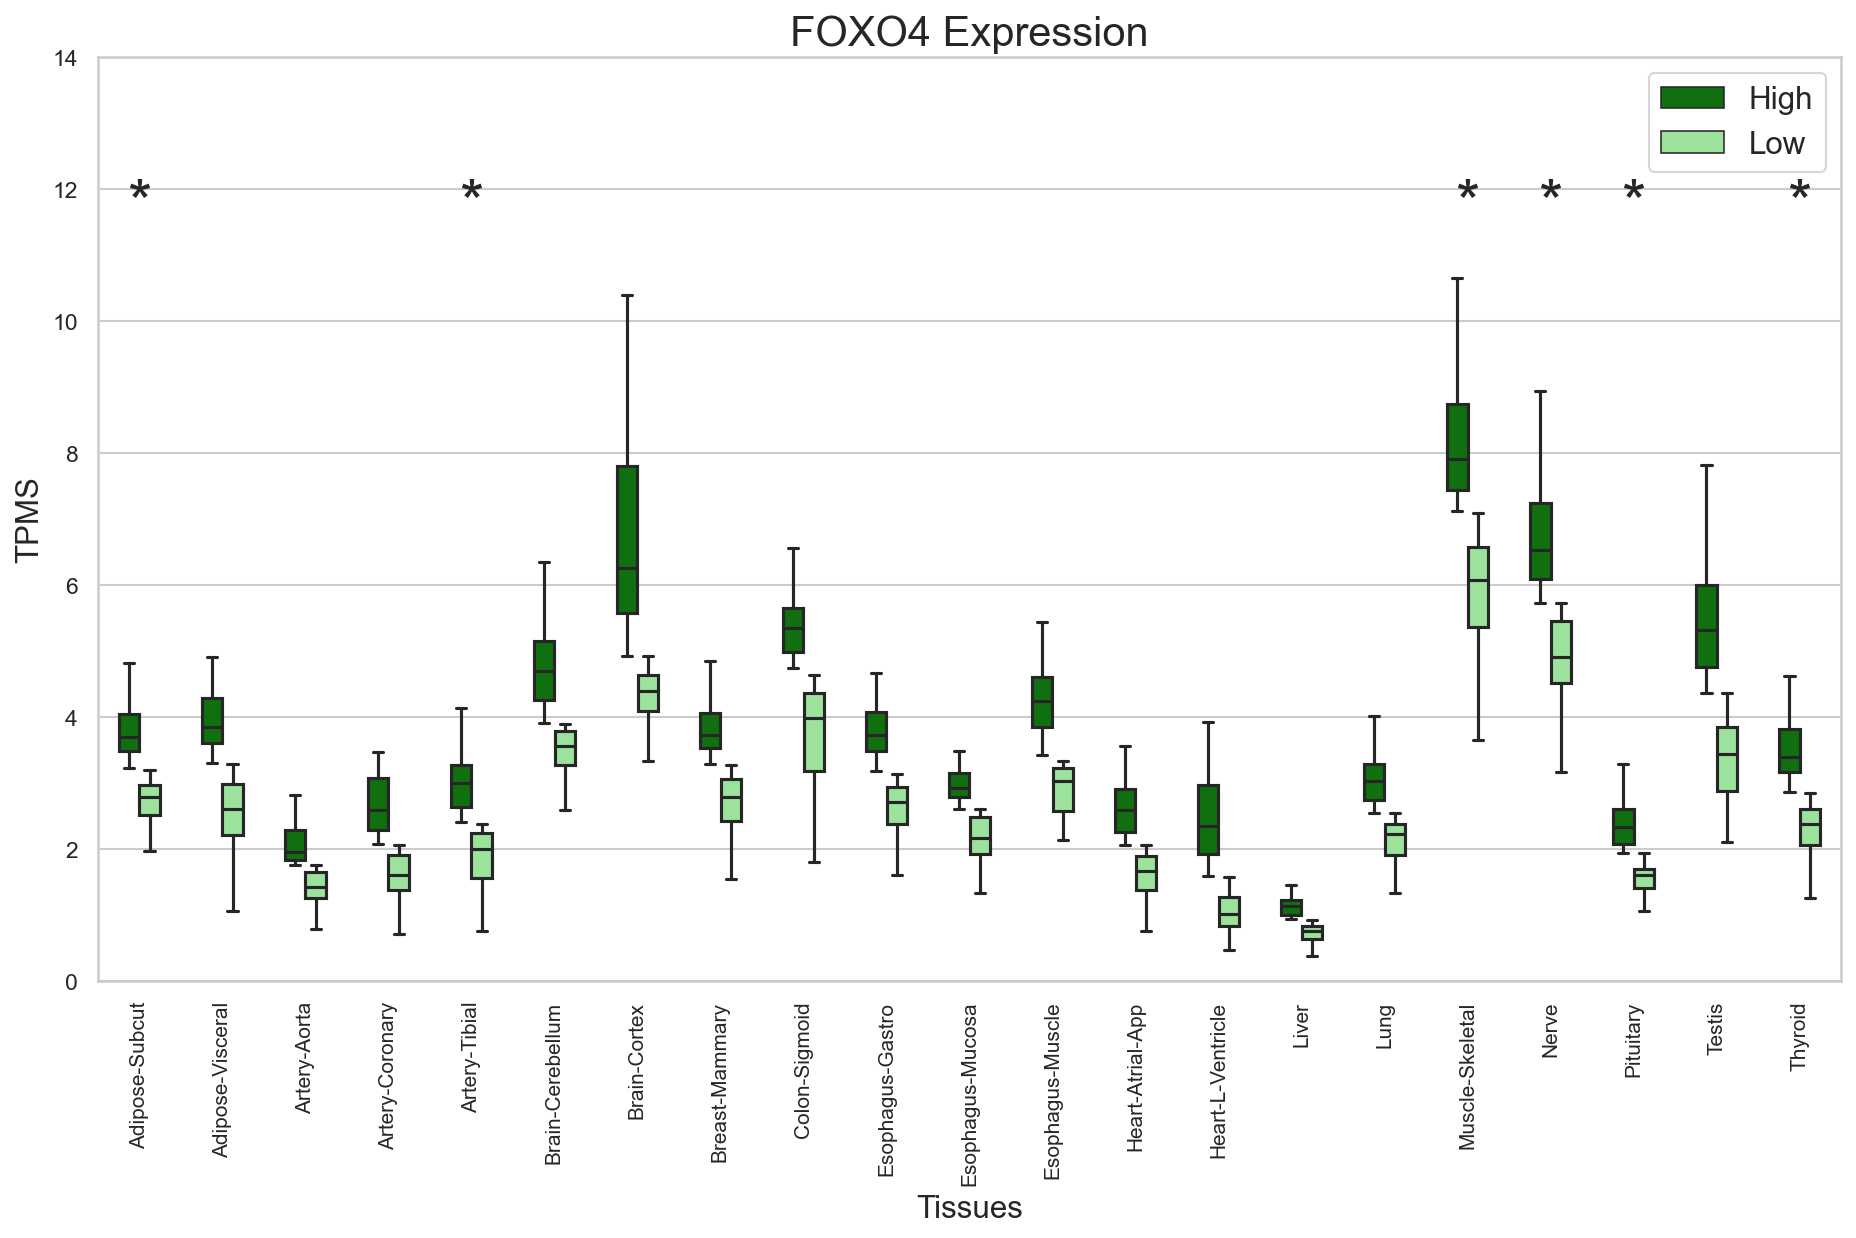

In [16]:
# Gráfico com a expressão de FOXO1 divido de acordo com a mediana em todos os tecidos
sns.set (style = 'whitegrid')
fig, ax = plt.subplots (figsize = (15,8), dpi = 150)
sns.boxplot(data= exp_m, x="tissue", y='tpms', hue = 'Expression', palette = ('green', 'lightgreen'), width =.5, fliersize=0)
plt.title ('FOXO4 Expression', fontsize=20)
plt.xticks(rotation = 90, fontsize = 10)
plt.xlabel ('Tissues', fontsize = 15)
plt.ylabel ('TPMS', fontsize = 15)
plt.legend (fontsize = 15, loc = 'best')
ax.set_ylim([0, 14])

a = -0.15
b = 11.5
for i in range (21):
    ax.text(a, b, pvalue_med['significance'][i], fontsize = 30)
    a = a + 1
    
plt.savefig('FOXO4 Expression.png', format = 'png', dpi = 1200, bbox_inches ='tight')

In [42]:
s

,0,1
16,Muscle-Skeletal,4.717866e-30
20,Thyroid,4.404716e-28
0,Adipose-Subcut,9.379219e-28
18,Pituitary,9.075737e-27
4,Artery-Tibial,8.784765e-26
17,Nerve,8.789287e-26
15,Lung,5.848394e-25
6,Brain-Cortex,5.850329e-25
1,Adipose-Visceral,8.262003e-24
5,Brain-Cerebellum,8.263010e-24


In [11]:
contingency_table = pd.crosstab(exp_m['Expression'], t_exp['Age Group'])
contingency_table

Age Group,Old,Young
Expression,,
High,37,43
Low,38,42
